In [80]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
import hopsworks
import pandas as pd
import numpy as np

In [82]:
project = hopsworks.login()
fs = project.get_feature_store()

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/196769
Connected. Call `.close()` to terminate connection gracefully.


In [83]:
df = pd.read_csv("wine.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [84]:
df.info()
# the dtype of "type" column is object
# some elements are null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [85]:
df.describe()
# show data details of all the columns except "type"

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [86]:
df['type'].value_counts()
# Here is some info of "type"

type
white    4898
red      1599
Name: count, dtype: int64

In [87]:
wine_df = df.copy()
# avoid modifying the original DataFrame
numeric_columns = wine_df.select_dtypes(include=[np.number]).columns
wine_df[numeric_columns] = wine_df[numeric_columns].apply(lambda x: x.fillna(np.random.rand()))
# apply fillna method to each numeric column individually with random number
non_numeric_columns = wine_df.select_dtypes(exclude=[np.number]).columns
wine_df[non_numeric_columns] = wine_df[non_numeric_columns].fillna('Unknown')
# fill non-numeric columns with 'Unknown'
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [88]:
wine_df = pd.get_dummies(wine_df, columns=['type'])
# use get_dummies() function to perform one-hot encoding on the 'type' column
wine_df.info()
# the dtype of "type_red" and "type_white" columns are bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_red              6497 non-null   bool   
 13  type_white            6497 non-null   bool   
dtypes: bool(2), float64(11), int64(1)
memory usage: 621.9 KB


In [ ]:
target_variable = 'quality'
correlation_matrix = wine_df.corr()
# simply use pearson correlation coefficient to measure linear correlation
print(correlation_matrix[target_variable].sort_values(ascending=False))
correlation_upper_threshold = 0.15
correlation_lower_threshold = - 0.15
columns_to_drop = correlation_matrix[(correlation_matrix[target_variable] < correlation_upper_threshold) & 
                                     (correlation_matrix[target_variable] > correlation_lower_threshold)].index
wine_df = wine_df.drop(columns=columns_to_drop)
# discard the columns within the threshold
wine_df.info()

quality                 1.000000
alcohol                 0.444319
type_white              0.119323
citric acid             0.085774
free sulfur dioxide     0.055463
sulphates               0.037507
pH                      0.015467
residual sugar         -0.037049
total sulfur dioxide   -0.041385
fixed acidity          -0.074247
type_red               -0.119323
chlorides              -0.192389
volatile acidity       -0.265688
density                -0.305858
Name: quality, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 253.9 KB


In [90]:
wine_df.rename(columns={'volatile acidity': 'volatile_acidity'}, inplace=True)
# replace the name to avoid some potential error
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   volatile_acidity  6497 non-null   float64
 1   chlorides         6497 non-null   float64
 2   density           6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   quality           6497 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 253.9 KB


In [91]:
quality_counter = pd.DataFrame(wine_df['quality'].value_counts()).sort_values(by=["quality"])
# count the quantity of wine of each quality
quality_counter
# we can see the quantity of Q9 wines is too small

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


In [92]:
rows_to_duplicate = wine_df[wine_df['quality'] == 9]
wine_df_1 = pd.concat([wine_df, rows_to_duplicate], ignore_index=True)
wine_df = pd.concat([wine_df_1, rows_to_duplicate], ignore_index=True)
# not a good option, but for me the only way is to duplicate the existing data
quality_counter = pd.DataFrame(wine_df['quality'].value_counts()).sort_values(by=["quality"])
quality_counter

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,15


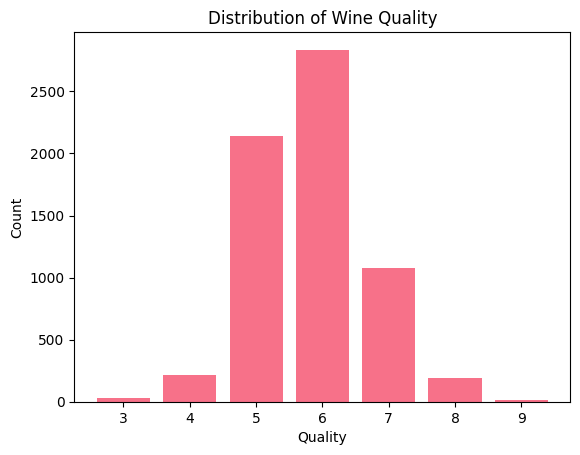

In [93]:
plt.bar(quality_counter.index, quality_counter['count'])
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

### Exploratory Data Analysis (EDA)  our Wine Data

We selected 4 different features
 * volatile_acidity
 * chlorides
 * density
 * alcohol
 
and the target variable is `quality`.

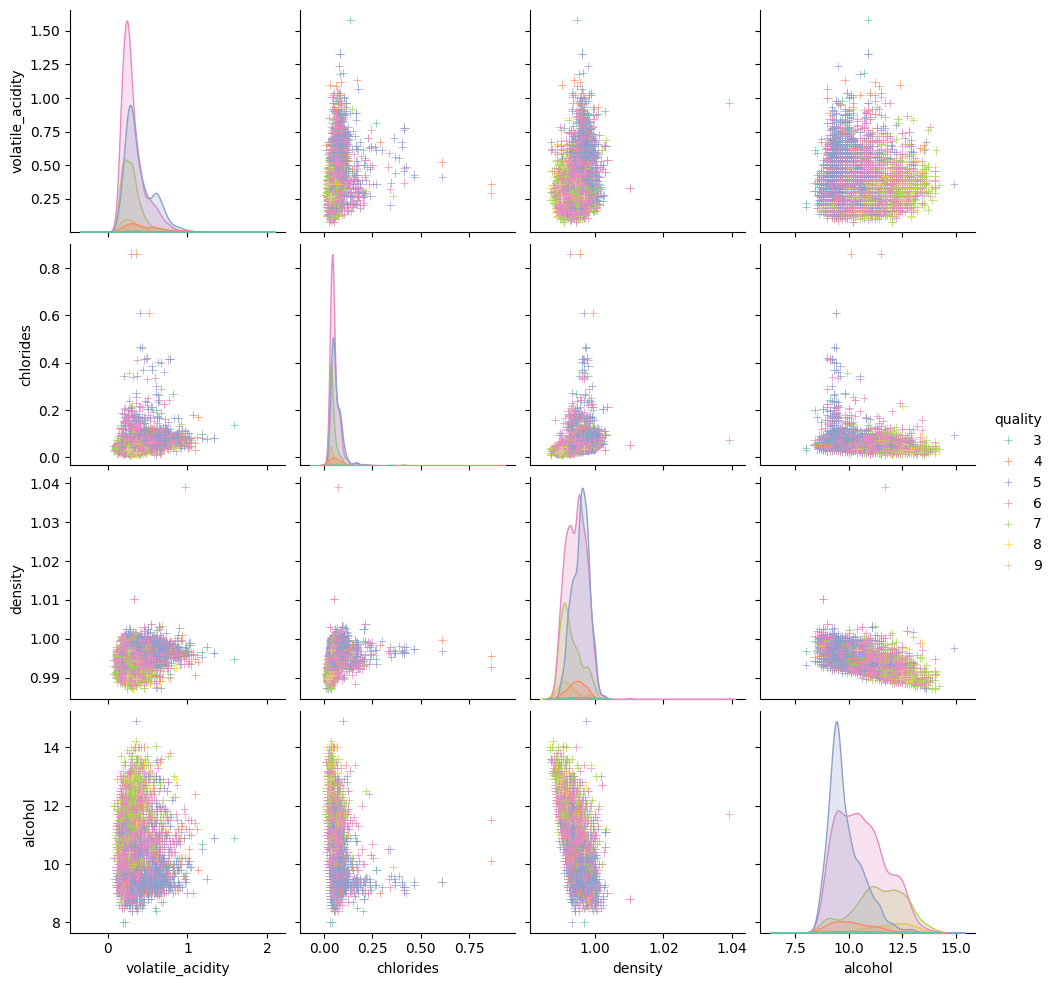

In [94]:
custom_palette = sns.color_palette("Set2", len(wine_df['quality'].unique()))
# make the color more parently
g = sns.pairplot(wine_df, hue='quality', markers='+', palette=custom_palette)
plt.show()

### Visualize range of values 

We hope to intuitively analyze wine through a variety of visualization methods.

2023-11-20 21:03:08,453 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:08,462 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


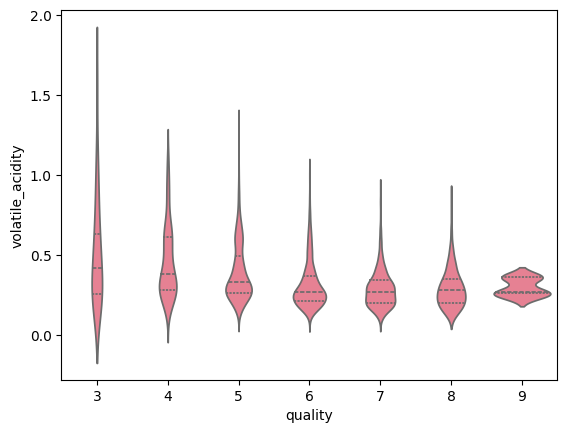

2023-11-20 21:03:08,637 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:08,643 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


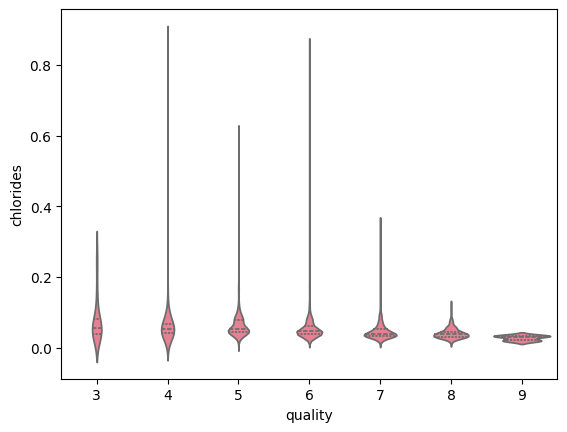

2023-11-20 21:03:08,811 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:08,821 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


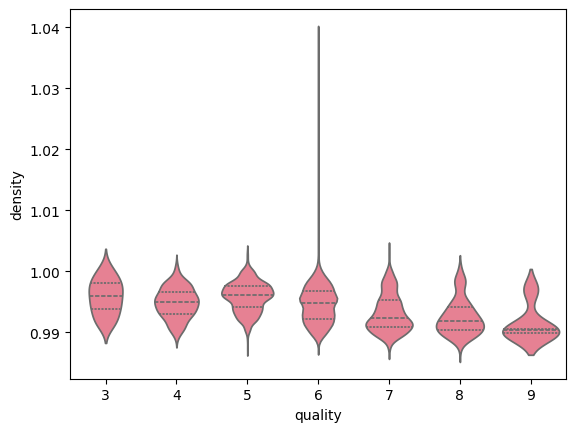

2023-11-20 21:03:08,980 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:08,989 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


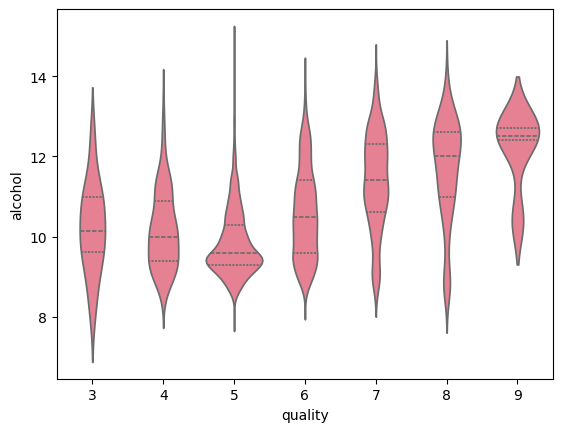

In [95]:
g = sns.violinplot(x="quality", y="volatile_acidity", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="chlorides", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="density", data=wine_df, inner='quartile')
plt.show()
g = sns.violinplot(x="quality", y="alcohol", data=wine_df, inner='quartile')
plt.show()
# Violin Plot

2023-11-20 21:03:09,813 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:09,821 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


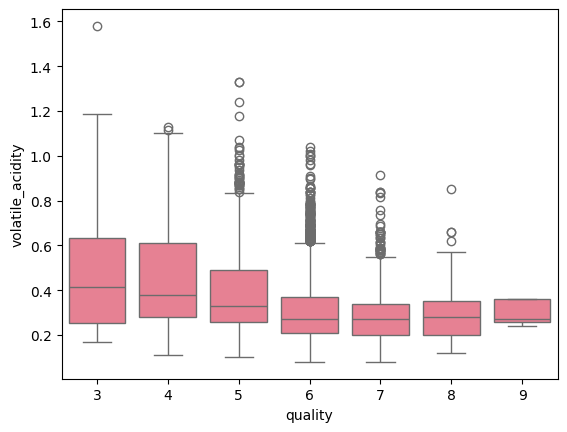

2023-11-20 21:03:09,948 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:09,955 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


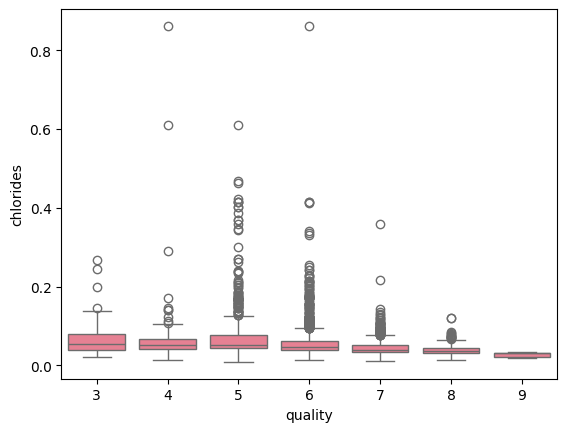

2023-11-20 21:03:10,107 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:10,117 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


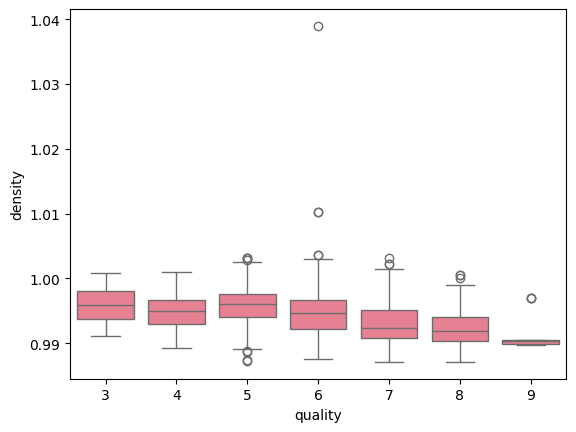

2023-11-20 21:03:10,240 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-20 21:03:10,249 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


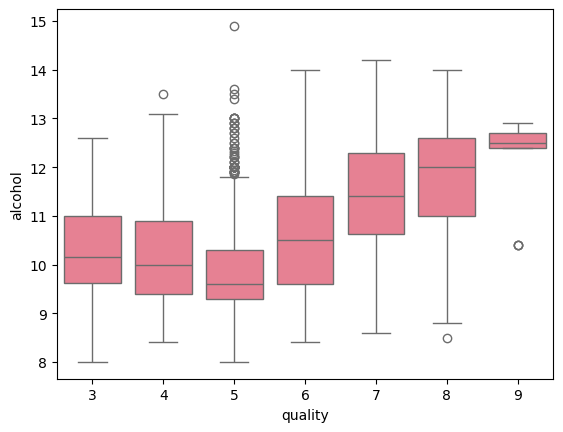

In [96]:
sns.boxplot(x='quality', y='volatile_acidity', data=wine_df)
plt.show()
sns.boxplot(x='quality', y='chlorides', data=wine_df)
plt.show()
sns.boxplot(x='quality', y='density', data=wine_df)
plt.show()
sns.boxplot(x='quality', y='alcohol', data=wine_df)
plt.show()
# Box Plot

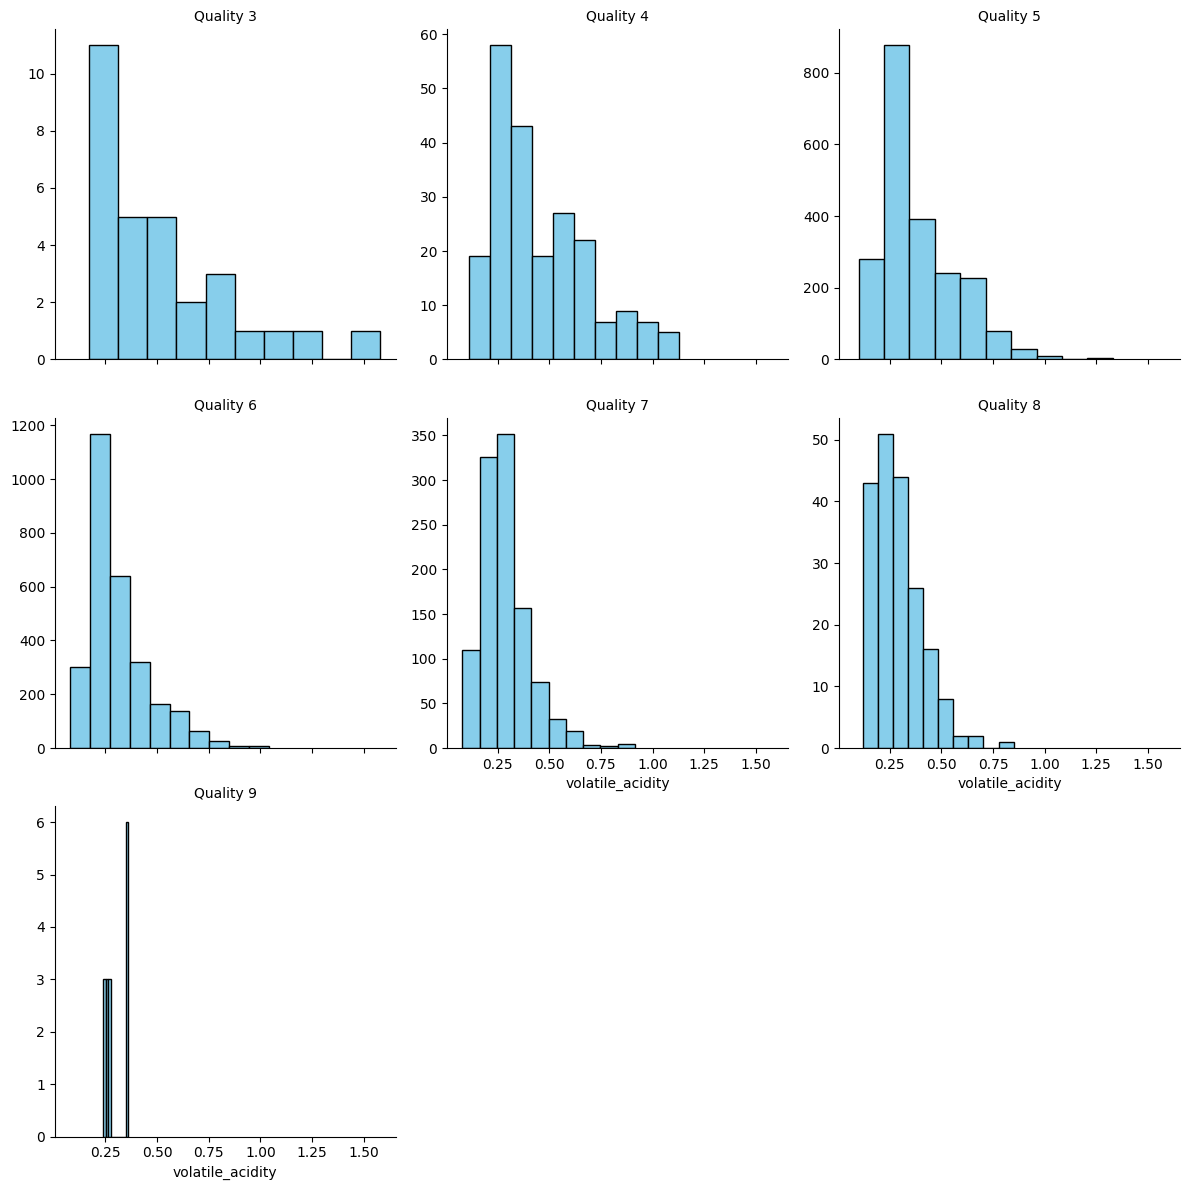

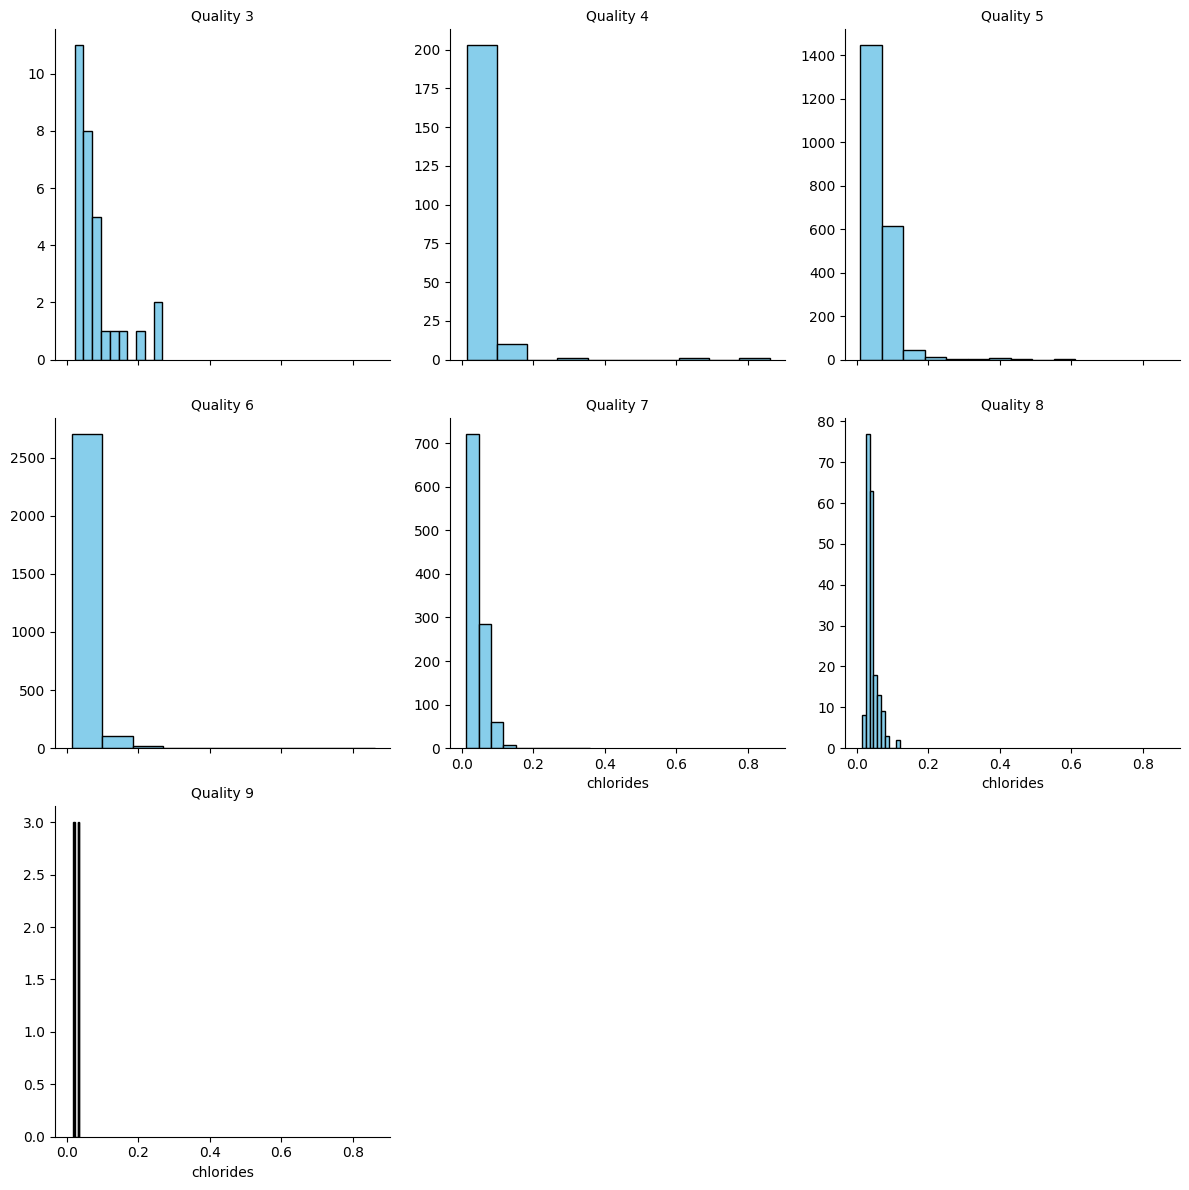

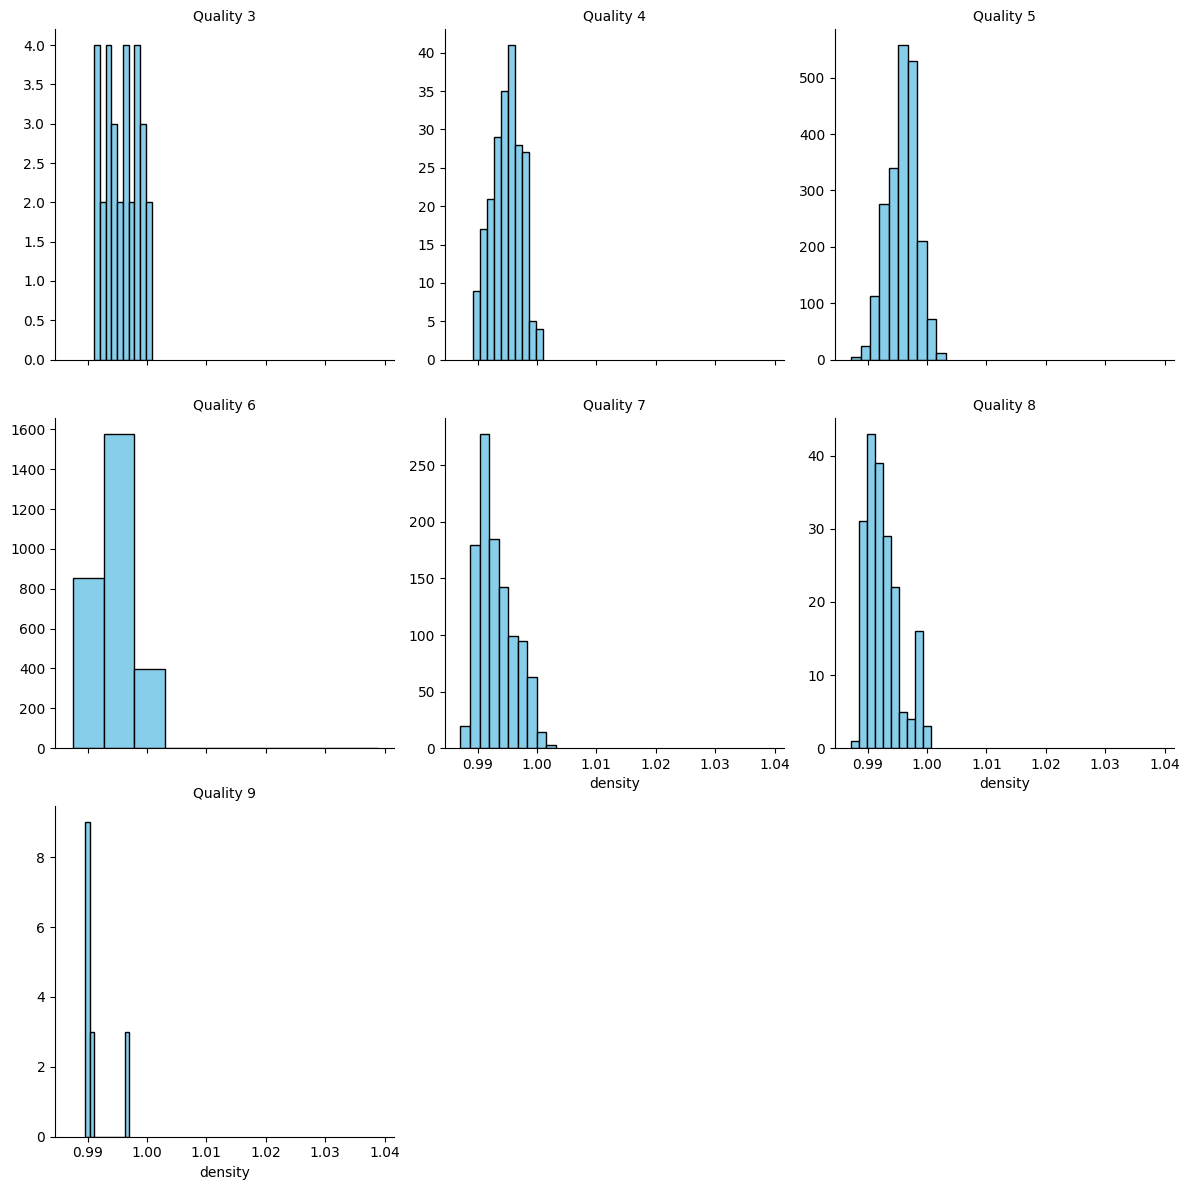

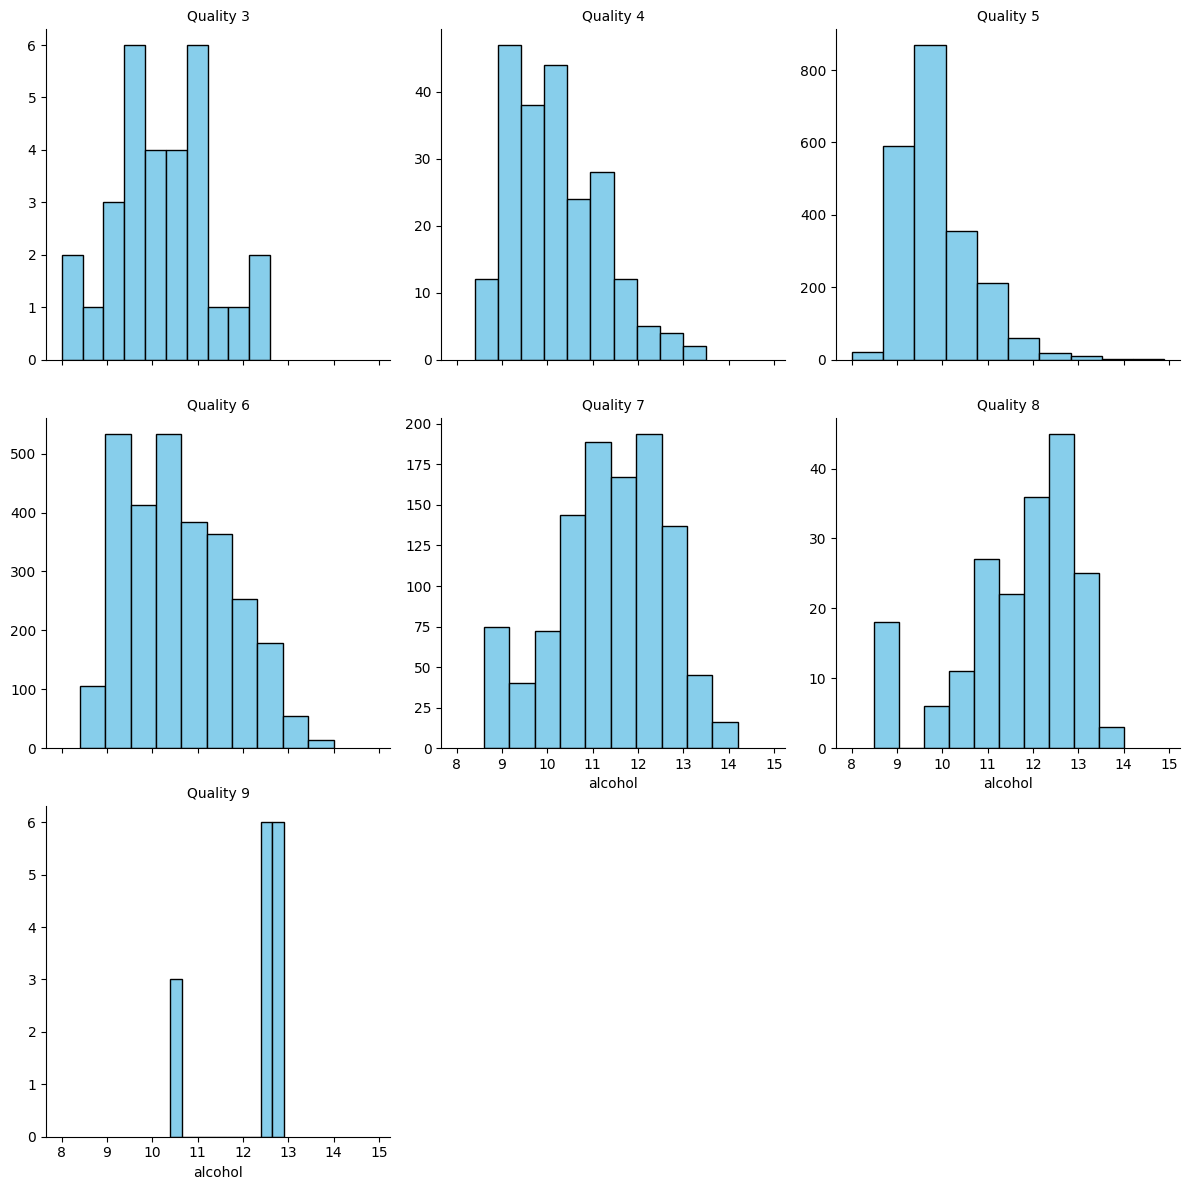

In [97]:
g1 = sns.FacetGrid(wine_df, col='quality', col_wrap=3, height=4, sharey=False)
g1.map(plt.hist, 'volatile_acidity', color='skyblue', edgecolor='black')
g1.set_titles('Quality {col_name}') 
plt.show()
g2 = sns.FacetGrid(wine_df, col='quality', col_wrap=3, height=4, sharey=False)
g2.map(plt.hist, 'chlorides', color='skyblue', edgecolor='black')
g2.set_titles('Quality {col_name}')
plt.show()
g3 = sns.FacetGrid(wine_df, col='quality', col_wrap=3, height=4, sharey=False)
g3.map(plt.hist, 'density', color='skyblue', edgecolor='black')
g3.set_titles('Quality {col_name}')
plt.show()
g4 = sns.FacetGrid(wine_df, col='quality', col_wrap=3, height=4, sharey=False)
g4.map(plt.hist, 'alcohol', color='skyblue', edgecolor='black')
g4.set_titles('Quality {col_name}')
plt.show()
# Histogram

### Insert our Wine DataFrame into a FeatureGroup
Let's write our historical wine feature values and labels to a feature group.
When you write historical data, this process is called `backfilling`.

In [98]:
wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=4,
    # remember to change the version if we want to modify the feature group
    primary_key=["volatile_acidity","chlorides","density","alcohol"], 
    description="Wine dataset")
wine_fg.insert(wine_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/196769/fs/196688/fg/241010


Uploading Dataframe: 0.00% |          | Rows 0/6507 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: wine_4_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/196769/jobs/named/wine_4_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x2148b90caf0>, None)

### Data Validation
If you want, you can enable data validation for your feature group.
The code below will prevent iris flower data from being written your your feature group if you write values outside the expected ranges.

In [99]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [100]:
suite = ExpectationSuite(expectation_suite_name="iris_dimensions")

expect(suite, "volatile_acidity", 0.1, 1.2)
expect(suite, "chlorides", 0.01, 0.15)
expect(suite, "density", 0.985, 1.005)
expect(suite, "alcohol", 8, 15)
# set threshold
wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    
# an error will be raised if we change nothing and re-execute this
# it's ok, just a warning that the threshold had already created

Attached expectation suite to Feature Group, edit it at https://c.app.hopsworks.ai:443/p/196769/fs/196688/fg/241010
